In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.utils import shuffle
import matplotlib.pyplot as plt 
from matplotlib.colors import ListedColormap

In [43]:
# read Iris data set

dataset = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header = None)
iris = dataset.iloc[:,:].values

X = dataset.iloc[:, :-1].values
y_ = dataset.iloc[:, 4].values


In [44]:
# get Iris classifications

classes = np.unique(y_)
classes

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [45]:
pltC = ('red', 'blue', 'green')
pltM = ('o', 'x', '*')
for i in range(0,3):
    print(classes[i], pltC[i], pltM[i])
          

Iris-setosa red o
Iris-versicolor blue x
Iris-virginica green *


In [46]:
# setup Iris feature lablels

IrisF=("sepal length in cm", "sepal width in cm", "petal length in cm", "petal width in cm")
for i in range(0,4):
    print(IrisF[i])


sepal length in cm
sepal width in cm
petal length in cm
petal width in cm


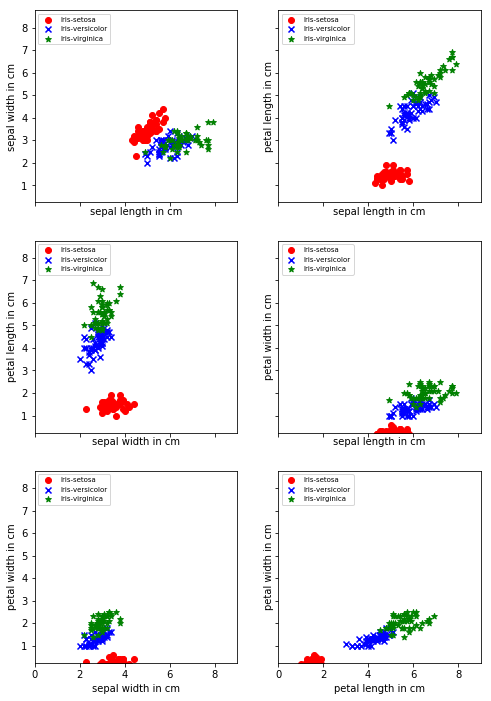

In [47]:
plt.close('all')
fig, ax = plt.subplots(nrows=3, ncols=2, figsize= (8,12), sharex=True, sharey=True)


i = 0
k = 0
k1 = 0
k2 = 0
while i < 4:
    yF = IrisF[i]
    j = 0
    while j < i:
        k1 = np.int(k/2)
        k2 = np.mod(k,2)
        xF = IrisF[j]
        ax[k1,k2].scatter(x=iris[y_ == classes[0], j], y=iris[y_ == classes[0], i], color=pltC[0], 
                          marker=pltM[0], label=classes[0])
        ax[k1,k2].scatter(x=iris[y_ == classes[1], j], y=iris[y_ == classes[1], i], color=pltC[1], 
                          marker=pltM[1], label=classes[1])
        ax[k1,k2].scatter(x=iris[y_ == classes[2], j], y=iris[y_ == classes[2], i], color=pltC[2], 
                          marker=pltM[2], label=classes[2])
        ax[k1,k2].set(aspect='equal')
        ax[k1,k2].set_xlim([0,9])
        ax[k1,k2].set_ylim([0,9])
        ax[k1,k2].set_xlabel(xF)
        ax[k1,k2].set_ylabel(yF)
        ax[k1,k2].legend(loc='upper left', fontsize='x-small')
        j += 1
        k += 1
    i += 1
plt.show() 


In [48]:
# focus on classification of "setosa" and "versicolor", class indexes 0 and 1
# set to 1 and -1 in class array
# focus on the features "sepal length" and "petal length", feature indexes 0 and 2


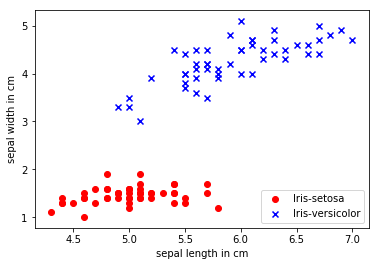

In [49]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

labelencodery_ = LabelEncoder()
y_ = labelencodery_.fit_transform(y_)


# Focus on classification of "setosa" and "versicolor" , class indexes 0 and 1
new_y = []
for i in range(0, 150):
    if y_[i] == 0:
        new_y.append(1)
    if y_[i] == 1:
        new_y.append(-1)
X_ = X[:100, [0, 2]]            
y = np.asarray(new_y)

plt.close('all')
plt.scatter(x = X_[y == 1, 0], y = X_[y == 1, 1], color=pltC[0], 
            marker=pltM[0], label=classes[0])
plt.scatter(x = X_[y == -1, 0], y = X_[y == -1, 1], color=pltC[1], 
            marker=pltM[1], label=classes[1])
plt.xlabel(IrisF[0])
plt.ylabel(IrisF[1])
plt.legend(loc='lower right')
plt.show()

In [50]:
class AdalineGD(object):
    """Perceptron classifier.
    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.
    
    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications in every epoch.
    """
    def __init__(self, alpha=0.01, n_iter=10):
        self.alpha = alpha
        self.n_iter = n_iter
        
    def fit(self, X, y):
        """Fit training data.
        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples
            is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.
            
        Returns
        -------
        self : object
        
        """
        self.theta = np.zeros(1 + X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            h = self.hypothesis(X) # h(theta0 + theta1 * Xj)
            errors = (y - h)
            self.theta[0] += self.alpha * errors.sum() # sum(y - h)
            self.theta[1:] += self.alpha * np.dot(X.T, errors) # sum((y - h).* Xj) 
            cost = (errors**2).sum() / 2.0 # J = 1/2 * sum(y - h).^2
            self.cost_.append(cost) # matrix record of error terms to be plotted
        return self
    
    def hypothesis(self, X):
        """Calculate net input"""
        return np.dot(X, self.theta[1:]) + self.theta[0]
      
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.hypothesis(X) >= 0.0, 1, -1)
        
    def accuracy(self, X, y):
        """ Return accuracy of the model """
        return (1.0 - abs(y - self.predict(X)).sum() / (2.0 * y.size))

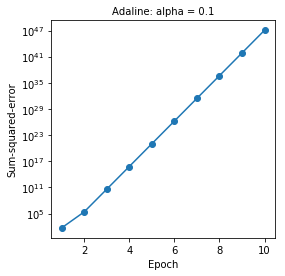

In [51]:

plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (4,4))
ada = AdalineGD(n_iter=10, alpha=0.1).fit(X_, y)
ax.semilogy(range(1, len(ada.cost_) + 1), ada.cost_, marker = 'o')
ax.set_xlabel('Epoch')
ax.set_ylabel('Sum-squared-error')
ax.set_title('Adaline: alpha = 0.1', fontsize ='medium')
plt.show()

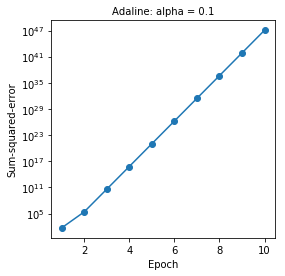

In [52]:

plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (4,4))
ada = AdalineGD(n_iter=10, alpha=0.1).fit(X_, y)
ax.semilogy(range(1, len(ada.cost_) + 1), ada.cost_, marker = 'o')
ax.set_xlabel('Epoch')
ax.set_ylabel('Sum-squared-error')
ax.set_title('Adaline: alpha = 0.1', fontsize ='medium')
plt.show()


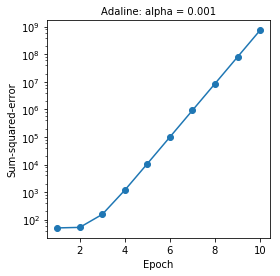

In [53]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (4,4))
ada = AdalineGD(n_iter=10, alpha=0.001).fit(X_, y)
ax.semilogy(range(1, len(ada.cost_) + 1), ada.cost_, marker = 'o')
ax.set_xlabel('Epoch')
ax.set_ylabel('Sum-squared-error')
ax.set_title('Adaline: alpha = 0.001', fontsize ='medium')
plt.show()

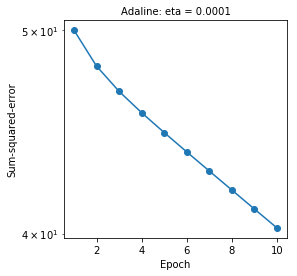

In [54]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (4,4))
ada = AdalineGD(n_iter=10, alpha=0.0001).fit(X_,y)
ax.semilogy(range(1, len(ada.cost_) + 1), ada.cost_, marker = 'o')
ax.set_xlabel('Epoch')
ax.set_ylabel('Sum-squared-error')
ax.set_title('Adaline: eta = 0.0001', fontsize ='medium')
plt.show()

In [55]:
# Standardize Inputs

X_std = np.copy(X_)
X_std[:,0] = (X_[:,0] - X_[:,0].mean()) / X_[:,0].std()
X_std[:,1] = (X_[:,1] - X_[:,1].mean()) / X_[:,1].std()


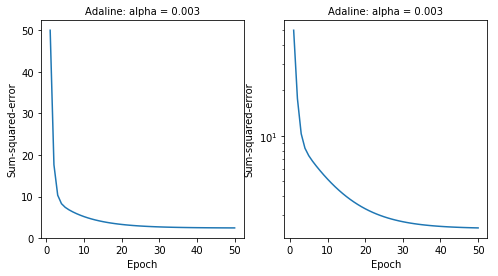

In [56]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (8,4))

ada = AdalineGD(n_iter=50, alpha=0.003)
ada.fit(X_std, y)
ax[0].plot(range(1, len(ada.cost_) + 1), ada.cost_)
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Sum-squared-error')
ax[0].set_title('Adaline: alpha = 0.003', fontsize='medium')
ax[1].semilogy(range(1, len(ada.cost_) + 1), ada.cost_)
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline: alpha = 0.003', fontsize='medium')
plt.show()

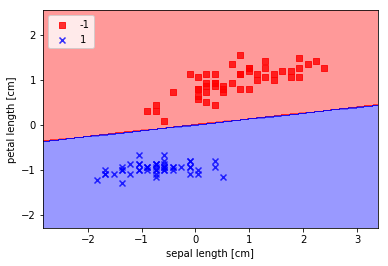

In [57]:
plt.close('all')
def plot_decision_regions(X, y, classifier, resolution=0.02):
    
# setup marker generator and color map   
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)
        
plot_decision_regions(X_std, y, classifier=ada)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

In [58]:
print(ada.accuracy(X_std, y))

1.0


In [59]:
# Now we'll try it with classes that are not linearly separable

In [60]:
# focus on classification of "versicolor" and "verginica", class indexes 1 and 2
# set to 1 and -1 in class array
cdx = np.array([1,2])   
# focus on the features "sepal length" and "petal length", feature indexes 0 and 2
fdx = np.array([0,2])

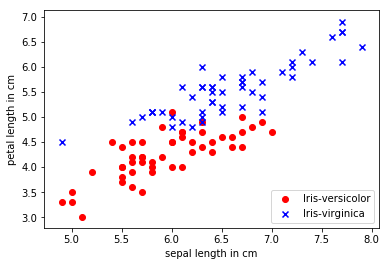

In [61]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

labelencodery_ = LabelEncoder()
y_ = labelencodery_.fit_transform(y_)

new_y = []
for i in range(0, 150):
    if y_[i] == 1:
        new_y.append(1)
    if y_[i] == 2:
        new_y.append(-1)
X_ = X[50:150, [0, 2]]            
y = np.asarray(new_y)

plt.close('all')
plt.scatter(x = X_[y == 1, 0], y = X_[y == 1, 1], color=pltC[0], 
            marker=pltM[0], label=classes[1])
plt.scatter(x = X_[y == -1, 0], y = X_[y == -1, 1], color=pltC[1], 
            marker=pltM[1], label=classes[2])
plt.xlabel(IrisF[0])
plt.ylabel(IrisF[2])
plt.legend(loc='lower right')
plt.show()

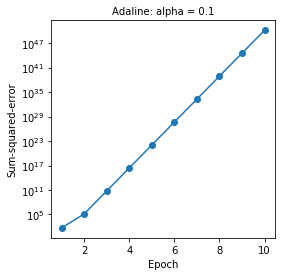

In [62]:

plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (4,4))
ada = AdalineGD(n_iter=10, alpha=0.1).fit(X_, y)
ax.semilogy(range(1, len(ada.cost_) + 1), ada.cost_, marker = 'o')
ax.set_xlabel('Epoch')
ax.set_ylabel('Sum-squared-error')
ax.set_title('Adaline: alpha = 0.1', fontsize ='medium')
plt.show()

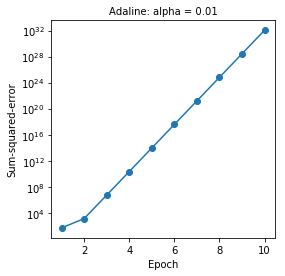

In [63]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (4,4))
ada = AdalineGD(n_iter=10, alpha=0.01).fit(X_,y)
ax.semilogy(range(1, len(ada.cost_) + 1), ada.cost_, marker = 'o')
ax.set_xlabel('Epoch')
ax.set_ylabel('Sum-squared-error')
ax.set_title('Adaline: alpha = 0.01', fontsize ='medium')
plt.show()

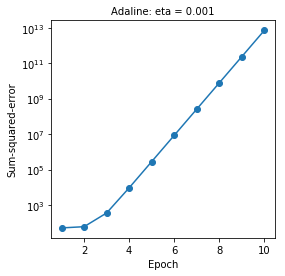

In [64]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (4,4))
ada = AdalineGD(n_iter=10, alpha=0.001).fit(X_,y)
ax.semilogy(range(1, len(ada.cost_) + 1), ada.cost_, marker = 'o')
ax.set_xlabel('Epoch')
ax.set_ylabel('Sum-squared-error')
ax.set_title('Adaline: eta = 0.001', fontsize ='medium')
plt.show()

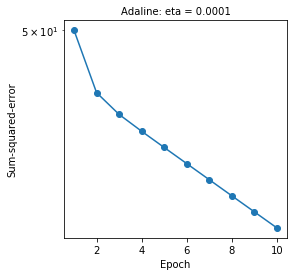

In [65]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (4,4))
ada = AdalineGD(n_iter=10, alpha=0.0001).fit(X_,y)
ax.semilogy(range(1, len(ada.cost_) + 1), ada.cost_, marker = 'o')
ax.set_xlabel('Epoch')
ax.set_ylabel('Sum-squared-error')
ax.set_title('Adaline: eta = 0.0001', fontsize ='medium')
plt.show()

In [66]:
# Standardize Inputs

X_std = np.copy(X_)
X_std[:,0] = (X_[:,0] - X_[:,0].mean()) / X_[:,0].std()
X_std[:,1] = (X_[:,1] - X_[:,1].mean()) / X_[:,1].std()

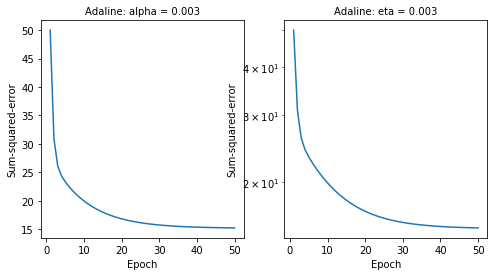

In [67]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (8,4))

ada = AdalineGD(n_iter=50, alpha=0.003)
ada.fit(X_std, y)
ax[0].plot(range(1, len(ada.cost_) + 1), ada.cost_)
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Sum-squared-error')
ax[0].set_title('Adaline: alpha = 0.003', fontsize='medium')
ax[1].semilogy(range(1, len(ada.cost_) + 1), ada.cost_)
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline: eta = 0.003', fontsize='medium')
plt.show()

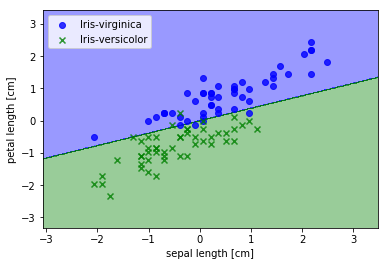

In [68]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
    
# setup marker generator and color map   
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('blue', 'green')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=pltM[idx], label=classes[cl])
        
plot_decision_regions(X_std, y, classifier=ada)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

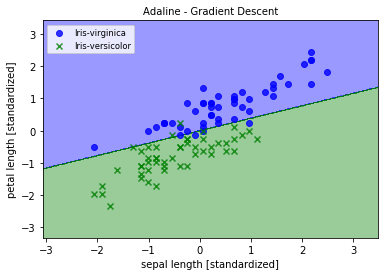

In [69]:
plot_decision_regions(X_std, y, classifier = ada)
plt.title('Adaline - Gradient Descent', fontsize='medium')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left', fontsize='small')
plt.show()

In [70]:
print(ada.accuracy(X_std, y))

0.94


In [71]:
# setosa and virginica 
# sepal width / petal length

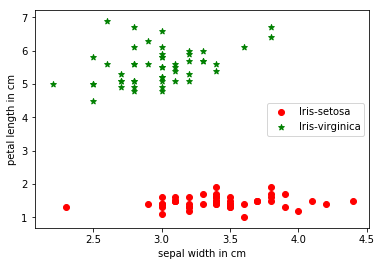

In [72]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

labelencodery_ = LabelEncoder()
y_ = labelencodery_.fit_transform(y_)

new_y = []
for i in range(0, 150):
    if y_[i] == 0:
        new_y.append(1)
    if y_[i] == 2:
        new_y.append(-1)
X_setosa = X[0:50, [1, 2]]
X_virginica = X[100:150, [1,2]]
X_ = np.vstack((X_setosa, X_virginica))
y = np.asarray(new_y)

plt.close('all')
plt.scatter(x = X_[y == 1, 0], y = X_[y == 1, 1], color=pltC[0], 
            marker=pltM[0], label=classes[0])
plt.scatter(x = X_[y == -1, 0], y = X_[y == -1, 1], color=pltC[2], 
            marker=pltM[2], label=classes[2])
plt.xlabel(IrisF[1])
plt.ylabel(IrisF[2])
plt.legend(loc='center right')
plt.show()

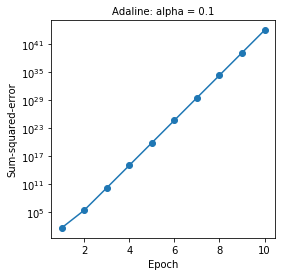

In [73]:

plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (4,4))
ada = AdalineGD(n_iter=10, alpha=0.1).fit(X_, y)
ax.semilogy(range(1, len(ada.cost_) + 1), ada.cost_, marker = 'o')
ax.set_xlabel('Epoch')
ax.set_ylabel('Sum-squared-error')
ax.set_title('Adaline: alpha = 0.1', fontsize ='medium')
plt.show()

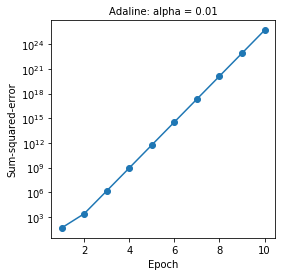

In [74]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (4,4))
ada = AdalineGD(n_iter=10, alpha=0.01).fit(X_,y)
ax.semilogy(range(1, len(ada.cost_) + 1), ada.cost_, marker = 'o')
ax.set_xlabel('Epoch')
ax.set_ylabel('Sum-squared-error')
ax.set_title('Adaline: alpha = 0.01', fontsize ='medium')
plt.show()

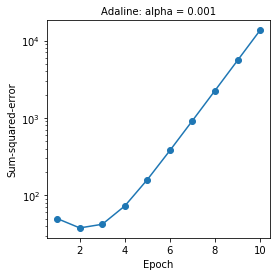

In [75]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (4,4))
ada = AdalineGD(n_iter=10, alpha=0.001).fit(X_,y)
ax.semilogy(range(1, len(ada.cost_) + 1), ada.cost_, marker = 'o')
ax.set_xlabel('Epoch')
ax.set_ylabel('Sum-squared-error')
ax.set_title('Adaline: alpha = 0.001', fontsize ='medium')
plt.show()

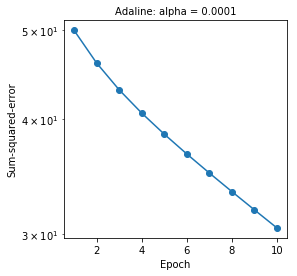

In [76]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (4,4))
ada = AdalineGD(n_iter=10, alpha=0.0001).fit(X_,y)
ax.semilogy(range(1, len(ada.cost_) + 1), ada.cost_, marker = 'o')
ax.set_xlabel('Epoch')
ax.set_ylabel('Sum-squared-error')
ax.set_title('Adaline: alpha = 0.0001', fontsize ='medium')
plt.show()

In [77]:
# Standardize Inputs

X_std = np.copy(X_)
X_std[:,0] = (X_[:,0] - X_[:,0].mean()) / X_[:,0].std()
X_std[:,1] = (X_[:,1] - X_[:,1].mean()) / X_[:,1].std()

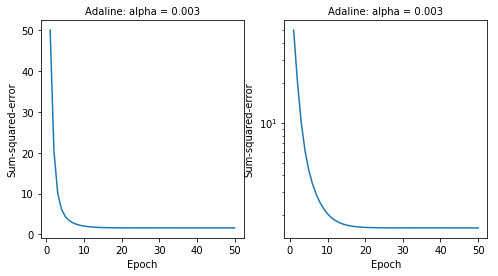

In [78]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (8,4))

ada = AdalineGD(n_iter=50, alpha=0.003)
ada.fit(X_std, y)
ax[0].plot(range(1, len(ada.cost_) + 1), ada.cost_)
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Sum-squared-error')
ax[0].set_title('Adaline: alpha = 0.003', fontsize='medium')
ax[1].semilogy(range(1, len(ada.cost_) + 1), ada.cost_)
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline: alpha = 0.003', fontsize='medium')
plt.show()

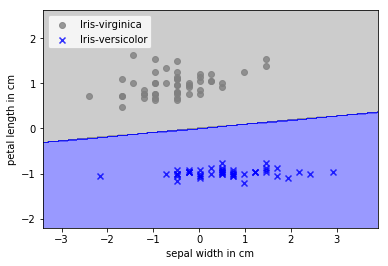

In [79]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
    
# setup marker generator and color map   
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('grey', 'blue')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=pltM[idx], label=classes[cl])
        
plot_decision_regions(X_std, y, classifier=ada)
plt.xlabel(IrisF[1])
plt.ylabel(IrisF[2])
plt.legend(loc='upper left')
plt.show()

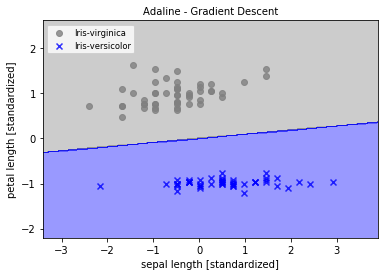

In [80]:
plot_decision_regions(X_std, y, classifier = ada)
plt.title('Adaline - Gradient Descent', fontsize='medium')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left', fontsize='small')
plt.show()


In [81]:
print(ada.accuracy(X_std, y))

1.0


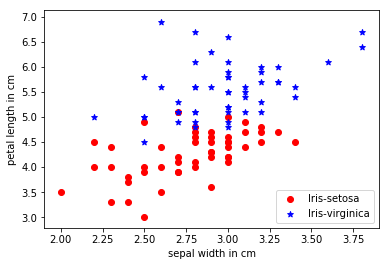

In [82]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

labelencodery_ = LabelEncoder()
y_ = labelencodery_.fit_transform(y_)

new_y = []
for i in range(0, 150):
    if y_[i] == 0:
        new_y.append(1)
    if y_[i] == 2:
        new_y.append(-1)
X_ = X[50:150, [1, 2]]            
y = np.asarray(new_y)

plt.close('all')
plt.scatter(x = X_[y == 1, 0], y = X_[y == 1, 1], color=pltC[0], 
            marker=pltM[0], label=classes[0])
plt.scatter(x = X_[y == -1, 0], y = X_[y == -1, 1], color=pltC[1], 
            marker=pltM[2], label=classes[2])
plt.xlabel(IrisF[1])
plt.ylabel(IrisF[2])
plt.legend(loc='lower right')
plt.show()